In [11]:
import pandas as pd
a=pd.read_csv("/content/train-1.csv")
a=a.fillna(0)
print(a)


              ID  Estimated_Insects_Count  Crop_Type  Soil_Type  \
0      F00000001                      188          1          0   
1      F00000003                      209          1          0   
2      F00000004                      257          1          0   
3      F00000005                      257          1          1   
4      F00000006                      342          1          0   
...          ...                      ...        ...        ...   
88853  F00155935                     3337          1          0   
88854  F00155938                     3516          1          0   
88855  F00155939                     3516          1          0   
88856  F00155942                     3702          1          0   
88857  F00155945                     3895          1          0   

       Pesticide_Use_Category  Number_Doses_Week  Number_Weeks_Used  \
0                           1                  0                0.0   
1                           1                  0     

In [12]:
y=a["Season"]
print(y)


0        1
1        2
2        2
3        2
4        2
        ..
88853    3
88854    1
88855    2
88856    3
88857    3
Name: Season, Length: 88858, dtype: int64


In [13]:
x=a.drop(['ID','Season'],axis=1)
print(x)
print(y)


       Estimated_Insects_Count  Crop_Type  Soil_Type  Pesticide_Use_Category  \
0                          188          1          0                       1   
1                          209          1          0                       1   
2                          257          1          0                       1   
3                          257          1          1                       1   
4                          342          1          0                       1   
...                        ...        ...        ...                     ...   
88853                     3337          1          0                       2   
88854                     3516          1          0                       2   
88855                     3516          1          0                       2   
88856                     3702          1          0                       2   
88857                     3895          1          0                       2   

       Number_Doses_Week  Number_Weeks_

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=35)
#print(x_train)
#print(y_train)
#print(x_train.shape)
#print(y_train.shape)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
from sklearn.metrics import accuracy_score
y_pred1 = model.predict(x_test)
accuracy_LR = accuracy_score(y_test, y_pred1)
print("Accuracy:", accuracy_LR)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score


# Create a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred1)
print(f'Accuracy: {accuracy:.2f}')



Accuracy: 0.5030947557956336
Accuracy: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.50


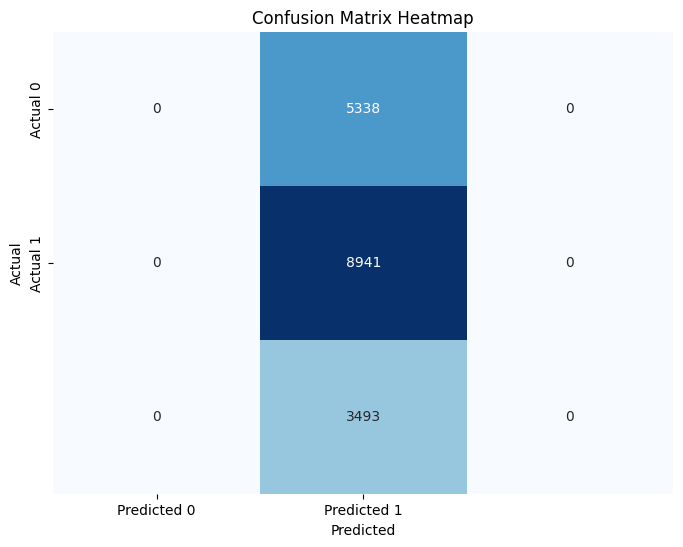

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score


# Create a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred1)
print(f'Accuracy: {accuracy:.2f}')

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()
# Import necessary libraries

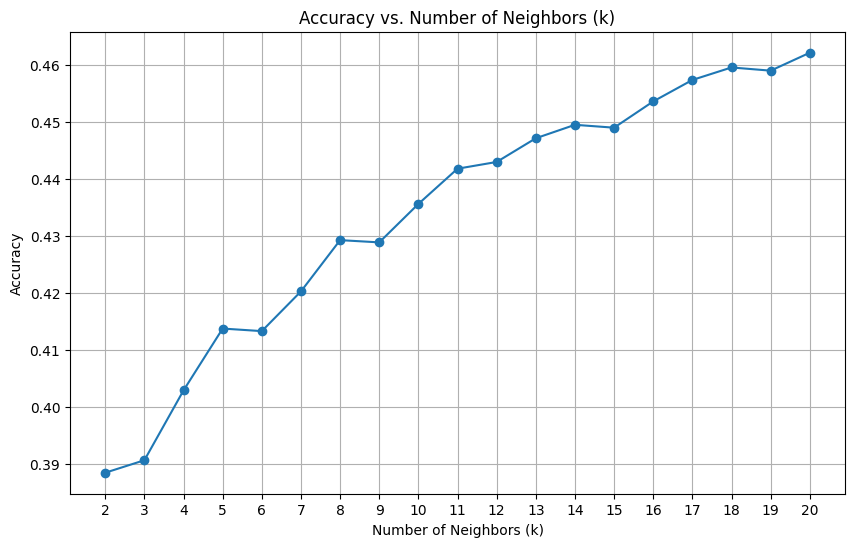

Maximum Accuracy: 46.22% for k = 20


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize empty lists to store accuracy values and corresponding 'k' values
k_values = []
accuracy_values = []

# Iterate through different 'k' values from 2 to 20
for k in range(2, 21):
    # Create a k-NN classifier with the current 'k' value
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn_classifier.fit(x_train, y_train)

    # Make predictions on the test data
    y_pred = knn_classifier.predict(x_test)

    # Calculate the accuracy and store it
    accuracy = accuracy_score(y_test, y_pred)
    k_values.append(k)
    accuracy_values.append(accuracy)

# Plot the accuracy versus 'k'
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_values, marker='o', linestyle='-')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(np.arange(2, 21, step=1))
plt.show()
# Find the index of the maximum accuracy value
max_accuracy_index = accuracy_values.index(max(accuracy_values))

# Get the corresponding 'k' value for the maximum accuracy
best_k = k_values[max_accuracy_index]

# Get the maximum accuracy value
max_accuracy = accuracy_values[max_accuracy_index]

# Print the results
print(f"Maximum Accuracy: {max_accuracy:.2%} for k = {best_k}")